<a href="https://colab.research.google.com/github/NiloferMubeen/Recommendation_Systems/blob/main/NN_recommendation_collaborative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

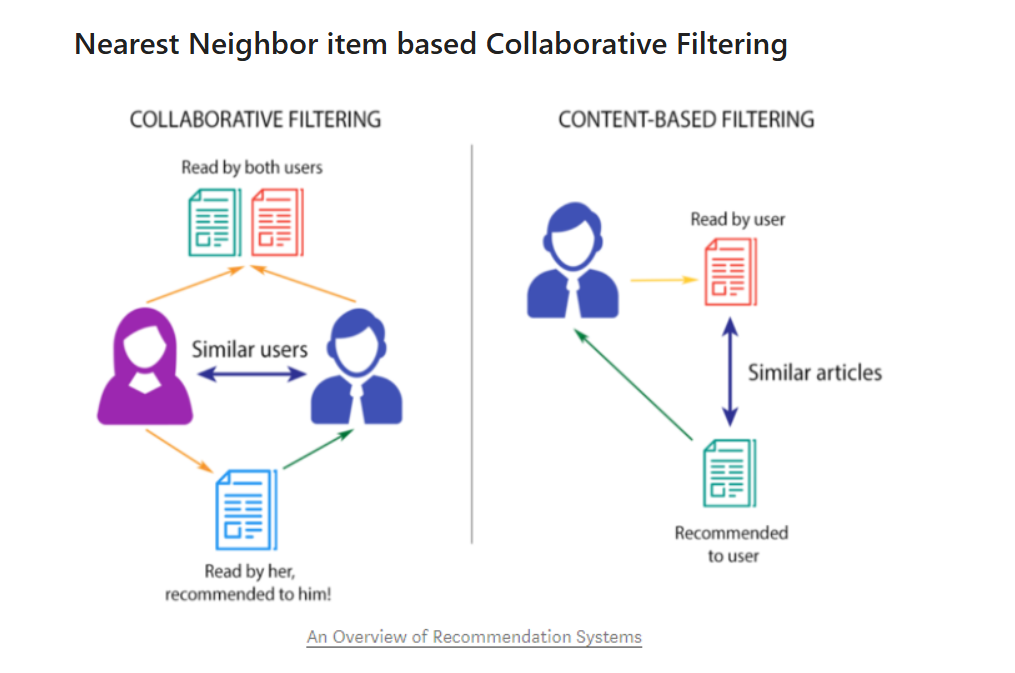

# **1. Collaborative Filtering (CF)**
Collaborative filtering makes recommendations based on user interactions and preferences. It assumes that if two users have had similar preferences in the past, they are likely to have similar preferences in the future.

### **Types of Collaborative Filtering:**

> * **User-based CF:** Recommends items by finding users with similar behavior.
> * **Item-based CF:** Recommends items by finding similar items based on user interactions.
>* **Matrix Factorization** (e.g., SVD, ALS): Reduces the dimensionality of user-item interactions for better recommendations.

**Example:**

If Alice and Bob both liked movies A and B, and Alice liked movie C, then Bob might also like movie C.


# **2. Content-Based Filtering (CBF)**

Content-based filtering makes recommendations based on the features of the items and the user's past interactions. It creates a user profile based on their preferences and suggests items with similar attributes.

**How It Works:**

> * Extracts features (e.g., genre, keywords, descriptions) from items.
> * Builds a user profile based on past preferences.
> * Recommends items with similar features to those liked by the user.

**Example:**

If Alice watches many action movies, the system will recommend other action movies.

# **3. Hybrid Filtering**
* Many modern recommendation systems combine collaborative and content-based filtering to overcome their individual limitations.

* For example, Netflix uses both approaches to recommend movies.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
movies = pd.read_csv("movies.csv",usecols=['movieId','title'],dtype={'movieId': 'int32', 'title': 'str'})
rating_df=pd.read_csv('ratings.csv',usecols=['userId', 'movieId', 'rating'],
    dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

In [ ]:
movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [ ]:
rating_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [ ]:
final_df = pd.merge(movies,rating_df,on = 'movieId')
final_df.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


In [ ]:
new_df = final_df.groupby('title')['rating'].count().reset_index().rename(columns= {'rating':"num_of_ratings"})


In [ ]:
new_df.head()

,title,num_of_ratings
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [ ]:
combined_df = pd.merge(final_df,new_df,on='title')
combined_df.head()

,movieId,title,userId,rating,num_of_ratings
0,1,Toy Story (1995),1,4.0,215
1,1,Toy Story (1995),5,4.0,215
2,1,Toy Story (1995),7,4.5,215
3,1,Toy Story (1995),15,2.5,215
4,1,Toy Story (1995),17,4.5,215


In [28]:
# considering only the movies more than 50 ratings

combined_df.shape

(100836, 5)

In [31]:
combined_df = combined_df[combined_df['num_of_ratings']>=50]
combined_df.shape

(41362, 5)

In [33]:
# creating a matrix

pivot = combined_df.pivot_table(index='title',columns='userId',values='rating').fillna(0)
pivot.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,5.0,0.0,3.0,0.0,4.5
28 Days Later (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,5.0
300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,4.0


In [35]:
from scipy.sparse import csr_matrix

movie_features_matrix = csr_matrix(pivot.values)

print(movie_features_matrix.toarray())

[[0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 3.  0.  4.5]
 ...
 [5.  0.  0.  ... 0.  0.  0. ]
 [0.  3.  0.  ... 0.  0.  3.5]
 [0.  0.  0.  ... 3.  0.  4. ]]


In [36]:
from sklearn.neighbors import NearestNeighbors # not knn


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute') # cosine similarily
model_knn.fit(movie_features_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [38]:
pivot.shape

(450, 606)

# Function to get movie recommendations

In [68]:
def recommend_movies(movie):
  index = pivot.index.get_loc(movie)
  distances, indices = model_knn.kneighbors(pivot.iloc[index,:].values.reshape(1, -1),n_neighbors=6)

  for i in range(0, len(distances.flatten())):
    if i == 0:
      print(f"Recommendations for {movie}:\n")
    else:
      print(f'{i}:',pivot.index[indices.flatten()[i]])


In [69]:
recommend_movies('Animal House (1978)')

Recommendations for Animal House (1978):

1: Caddyshack (1980)
2: Blazing Saddles (1974)
3: Ghostbusters (a.k.a. Ghost Busters) (1984)
4: Ferris Bueller's Day Off (1986)
5: Wizard of Oz, The (1939)


In [70]:
recommend_movies('Caddyshack (1980)')

Recommendations for Caddyshack (1980):

1: Animal House (1978)
2: Ferris Bueller's Day Off (1986)
3: Wayne's World (1992)
4: Spaceballs (1987)
5: Breakfast Club, The (1985)
